<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/%D0%9A%D0%B0%D1%80%D1%82%D0%B0%20%D0%B8%20%D1%82%D0%BE%D1%87%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl -q
import openpyxl

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [2]:
df = pd.read_excel('/content/apartments.xlsx', engine='openpyxl')
df.head()


,Listing ID,Listing URL,Listing Name,Host ID,Host URL,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Num_Review
0,10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,https://www.airbnb.com/users/show/44696672,Josh,09-20-15,NaN,NaN,f,NeukÃ¶lln,NeukÃ¶lln,Berlin,12047.0,DE,Germany,52.49234,13.42994,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,NaN,60.0,1,1,1,01-03-16,01-03-16,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f,1
1,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,https://www.airbnb.com/users/show/45848709,Belinda,10-05-15,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10405.0,DE,Germany,52.53292,13.41502,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,NaN,52.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,0
2,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,https://www.airbnb.com/users/show/40791092,Arkadij,08-07-15,within a few hours,1.0,f,Mitte,Mitte,Berlin,10178.0,DE,Germany,52.52134,13.41866,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,35.0,1,1,20,01-03-16,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f,20
3,10006747,https://www.airbnb.com/rooms/10006747,Altbauwohnung in Berlin-Pankow,51401040,https://www.airbnb.com/users/show/51401040,Esther,12-15-15,NaN,NaN,f,Pankow,Pankow,Berlin,13189.0,DE,Germany,52.56552,13.41189,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,NaN,30.0,1,4,2,12-28-15,01-06-16,90.0,10.0,9.0,9.0,8.0,9.0,9.0,f,f,2
4,10007526,https://www.airbnb.com/rooms/10007526,Mauerblick: Kreuzberg meets Mitte,8344366,https://www.airbnb.com/users/show/8344366,Kian,08-23-13,NaN,NaN,f,Potsdamer Platz,Friedrichshain-Kreuzberg,Berlin,10963.0,DE,Germany,52.50585,13.38580,t,Apartment,Private room,4,1.0,1.0,2.0,NaN,30.0,1,3,3,01-01-16,03-30-16,100.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23550 entries, 0 to 23549
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             23550 non-null  int64  
 1   Listing URL            23550 non-null  object 
 2   Listing Name           23496 non-null  object 
 3   Host ID                23550 non-null  int64  
 4   Host URL               23550 non-null  object 
 5   Host Name              23529 non-null  object 
 6   Host Since             23529 non-null  object 
 7   Host Response Time     13059 non-null  object 
 8   Host Response Rate     13059 non-null  float64
 9   Is Superhost           23529 non-null  object 
 10  neighbourhood          23550 non-null  object 
 11  Neighborhood Group     23550 non-null  object 
 12  City                   23547 non-null  object 
 13  Postal Code            22964 non-null  object 
 14  Country Code           23550 non-null  object 
 15  Co

In [4]:
df.describe()

,Listing ID,Host ID,Host Response Rate,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Num_Review
count,2.355000e+04,2.355000e+04,13059.000000,23550.000000,23550.000000,23550.000000,23521.000000,23530.000000,23515.000000,427.000000,23550.000000,23550.00000,23550.000000,18928.000000,18902.000000,18906.000000,18884.000000,18900.000000,18885.000000,18882.000000,23550.000000
mean,1.777983e+07,6.171756e+07,0.918446,52.509912,13.406185,2.671932,1.096021,1.161708,1.642058,485.480094,1.346157,6.90034,19.298471,94.563926,9.679981,9.335079,9.728924,9.746561,9.550384,9.417646,19.298471
std,9.888427e+06,6.781943e+07,0.194464,0.031275,0.058561,1.567881,0.346164,0.660594,1.228787,517.079921,0.856122,24.87503,40.476058,7.598217,0.737602,1.030974,0.695091,0.679421,0.748553,0.840252,40.476058
min,2.695000e+03,1.581000e+03,0.000000,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,9.054361e+06,9.811146e+06,0.950000,52.489182,13.375730,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.00000,1.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000
50%,1.874644e+07,3.422998e+07,1.000000,52.509215,13.416555,2.000000,1.000000,1.000000,1.000000,409.000000,1.000000,3.00000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000
75%,2.587844e+07,9.410927e+07,1.000000,52.532670,13.439510,3.000000,1.000000,1.000000,2.000000,742.500000,1.000000,4.00000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,17.000000
max,3.468232e+07,2.616142e+08,1.000000,52.651670,13.757640,16.000000,8.500000,10.000000,22.000000,4639.000000,16.000000,1000.00000,545.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,545.000000


In [5]:
df.isnull().sum()

Listing ID                   0
Listing URL                  0
Listing Name                54
Host ID                      0
Host URL                     0
Host Name                   21
Host Since                  21
Host Response Time       10491
Host Response Rate       10491
Is Superhost                21
neighbourhood                0
Neighborhood Group           0
City                         3
Postal Code                586
Country Code                 0
Country                      0
Latitude                     0
Longitude                    0
Is Exact Location            0
Property Type                0
Room Type                    0
Accomodates                  0
Bathrooms                   29
Bedrooms                    20
Beds                        35
Square Feet              23123
Price                        0
Guests Included              0
Min Nights                   0
Reviews                      0
First Review              4156
Last Review               4156
Overall 

In [6]:
df.columns

Index(['Listing ID', 'Listing URL', 'Listing Name', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City',
       'Postal Code', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Is Exact Location', 'Property Type', 'Room Type', 'Accomodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'First Review',
       'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Num_Review'],
      dtype='object')

**This dataset contains information on Airbnb listings in Berlin, including reviewer ratings and comments**

review_date: The date of the review. (Date)


Reviewer Name: The name of the reviewer. (String)


Comments: The reviewer's comments. (String)


Listing URL: The URL of the listing. (String)


Listing Name: The name of the listing. (String)


Host URL: The URL of the host. (String)


Host Name: The name of the host. (String)


Host Since: The date the host joined Airbnb. (Date)


Host Response Time: The host's response time. (String)


Host Response Rate: The host's response rate. (String)


Is Superhost: Whether or not the host is a Superhost. (Boolean)


neighbourhood: The neighbourhood of the listing. (String)


Neighborhood Group: The neighbourhood group of the listing. (String)


City: The city of the listing. (String)


Postal Code: The postal code of the listing. (String)


Country Code: The country code of the listing. (String)


Country Code: The country code of the listing. (String)


Latitude: The latitude of the listing. (Float)


Longitude: The longitude of the listing. (Float)


Is Exact Location: Whether or not the location is exact. (Boolean)


Property Type: The type of property. (String)


Room Type: The type of room. (String)


Accomodates: The number of people the property can accommodate. (Integer)


Bathrooms: The number of bathrooms. (Float)


Bedrooms: The number of bedrooms. (Integer)


Beds: The number of beds. (Integer)


Square Feet: The square footage of the property. (Float)


Price: The price of the listing. (Float)


Guests Included: The number of guests included in the price. (Integer)


Min Nights: The minimum number of nights required to stay. (Integer)


Reviews: The number of reviews the listing has. (Integer)


First Review: The date of the first review. (Date)


Last Review: The date of the last review. (Date)


Overall Rating: The listing's overall rating. (Float)


Accuracy Rating: The listing's accuracy rating. (Float)


Cleanliness Rating: The listing's cleanliness rating. (Float)


Checkin Rating: The listing's checkin rating. (Float)


Communication Rating: The listing's communication rating. (Float)


Location Rating: The listing's location rating. (Float)


Value Rating: The listing's value rating. (Float)

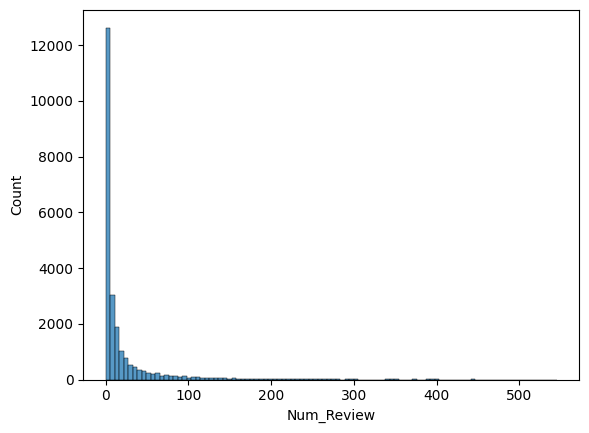

In [8]:
# prompt: Пострроить гистограмму на 'Num_Review' в сиборн, разбить на 100 кусков

sns.histplot(df['Num_Review'], bins=100)
plt.show()


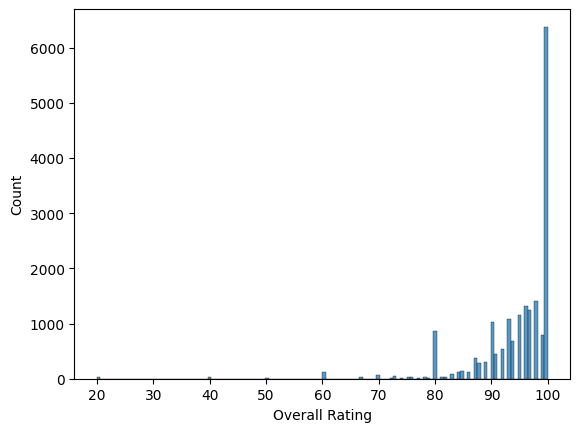

In [9]:
sns.histplot(df['Overall Rating'])
plt.show()

In [27]:
df.shape

(1000, 3)

In [26]:
data = df[['Latitude', 'Longitude','Location Rating']].sample(10000)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [17]:
!pip install -q folium matplotlib

import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_hex

In [22]:
df = pd.DataFrame(data)

df = pd.DataFrame(data)

# Создание цветовой карты от синего через зеленый до красного
colors = ['blue', 'green', 'red']
cmap = LinearSegmentedColormap.from_list('RatingColorMap', colors, N=10)

# Нормализация значений Rating для использования в цветовой карте
norm = Normalize(vmin=df['Location Rating'].min(), vmax=df['Location Rating'].max())

# Создание карты с использованием folium
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Добавление точек на карту
for idx, row in df.iterrows():
    color = to_hex(cmap(norm(row['Location Rating'])))
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=2,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Создание пользовательской цветовой легенды
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 150px; height: 100px;
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; border-radius:5px;
    ">
    <div style="padding: 10px;">
        <b>Location Rating</b><br>
        <i style="background:blue; width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>1<br>
        <i style="background:linear-gradient(blue, green, red); width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>...<br>
        <i style="background:red; width:18px; height:18px; float:left; margin-right:5px; border-radius:50%;"></i>10<br>
    </div>
</div>
'''

# Добавление легенды на карту
m.get_root().html.add_child(folium.Element(legend_html))

# Сохранение карты в файл
m.save('map.html')

# Отображение карты (если используется Jupyter Notebook или Colab)
m
m